# Polynomial regressions on SST trend data 

**Sources**

* https://towardsdatascience.com/polynomial-regression-which-python-package-to-use-78a09b0ac87b

* https://www.youtube.com/watch?v=Hwj_9wMXDVo (Andrew Ng course)

**Points**

Feature scaling needed for gradient descent method - as the squares, cubes, etc of the input variables increases, then the ranges of the features increases, so the coefficients on the higher powers becomes very small. So you need to scale the features to make them comparable. (Feature scaling not needed for normal equation method).


## Initialising the dataset, importing libraries

In [1]:
# Using HADSST4_timeseries.csv 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [2]:
# Opening file and define variables
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/HadSST4_timeseries.csv')
year = df['year']; anomaly = df['anomaly']

[Text(0, 0.5, 'SST in deg C'), Text(0.5, 1.0, 'SST Anomaly over time')]

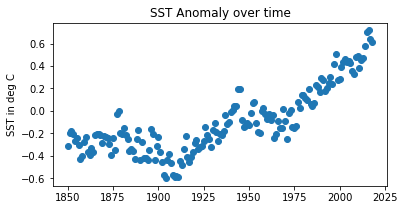

In [3]:
# Simple chart
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.scatter(year,anomaly); ax.set(Title='SST Anomaly over time',ylabel='SST in deg C')

## Using numpy

In [4]:
# Plotting this using a polynomial function
from numpy import polyfit
x = year 
y = anomaly

Coeffcients: [ 6.00692484e-05 -2.27506099e-01  2.15078346e+02]
p-values (TBC): [1.73168450e+00 3.56192620e-02 2.32219554e-04]


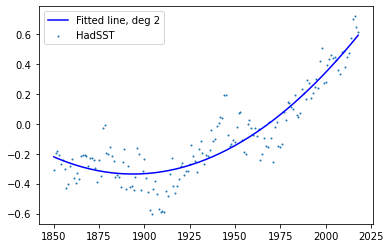

In [54]:
# %%timeit
# Using degree 1 gives the same value as linear regression, 
pfit = polyfit(x, y, deg=2,full=True) 
u = pfit[0] # using full=True on polyfit gives a tuple of multiple arrays
y_pred = u[0] * x**2 + u[1] * x + u[2]
print('Coeffcients:',pfit[0])
print('p-values (TBC):',pfit[3])

plt.plot(x,y_pred,color='blue',label='Fitted line, deg 2')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()


Coefficients: [ 4.32493561e-08 -1.90863516e-04  2.57612596e-01 -9.74226294e+01]
p-values (TBC): [1.99920965e+00 5.62180542e-02 5.67850402e-04 2.81594733e-06]


Text(0.5, 1.0, 'Global SST anomaly using polynomial of third degree')

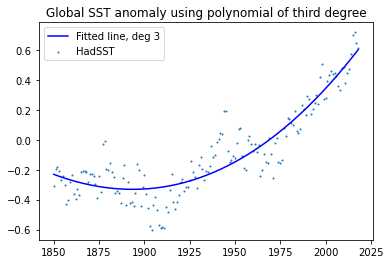

In [7]:
# Trying this with a polynomial of degree 3 - gives low coeff for x^3 term
pfit = polyfit(x, y, deg=3,full=True)
u = pfit[0]
print('Coefficients:',pfit[0])
print('p-values (TBC):',pfit[3]) # Does this give the p values of each coefficient?
y_pred2 = u[0] * x**3 + u[1] * x**2 + u[2] * x + u[3]

plt.plot(x,y_pred2,color='blue',label='Fitted line, deg 3')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly using polynomial of third degree')

Coefficients: [-2.29289496e-24  2.02539288e-20 -5.53924127e-17  3.55226355e-15
  1.79405218e-10  1.07319663e-08 -6.75040020e-04 -1.26141487e-01
  3.00212842e+03 -3.99290752e+06  1.66539754e+09]
p-values (TBC): [3.30665002e+00 2.56904363e-01 8.11154785e-03 1.60936433e-04
 2.28971890e-06 2.47764035e-08 2.09566115e-10 1.39565630e-12
 7.23457313e-15 7.25166577e-17 5.86766534e-17]


Text(0.5, 1.0, 'Global SST anomaly using polynomial of fourth degree')

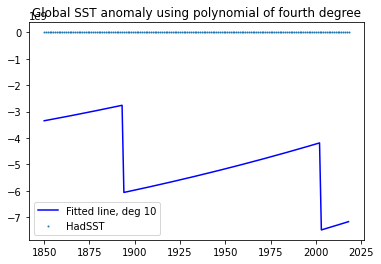

In [35]:
# Trying this with a polynomial of degree 10 - gives low coeff for x^3 term
pfit = polyfit(x, y, deg=10,full=True)
u = pfit[0]
print('Coefficients:',pfit[0])
print('p-values (TBC):',pfit[3]) # Does this give the p values of each coefficient?
y_pred2 = u[0] * x**10 + u[1] * x**9 + u[2] * x**8 + u[3] * x**7 + u[4] * x**6 + u[5] * x**5 + u[6] * x**4 + u[7] * x**3 + u[8] * x**2 + u[9] * x + u[10]

plt.plot(x,y_pred2,color='blue',label='Fitted line, deg 10')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly using polynomial of fourth degree') 
# yeah so this is pretty nuts

In [ ]:
# Combine them together?
# This includes way of doing it https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

## Using scikit-learn

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Supervised-learning-example:-Simple-linear-regression

Underfitting and overfitting, and using polynomial features

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

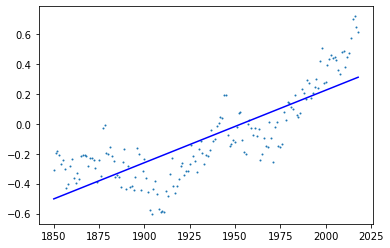

In [9]:
from sklearn.linear_model import LinearRegression
X = np.array(x)
X = np.reshape(X,(169,1))

linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
plt.plot(x,y_pred,color='blue',label='Fitted line')
plt.scatter(x,y,s=1,label='HadSST')

In [37]:
# Moving average
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/HadSST4_timeseries.csv')
year = df['year']; anomaly = df['anomaly']
df['rm'] = df['anomaly'].rolling(5).mean() # Added
rm = df['rm']

In [10]:
from sklearn.pipeline import Pipeline # Workflow management tool
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Anomaly in deg C')

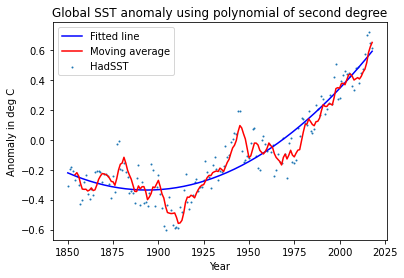

In [59]:
# %%timeit # curious about how long sklearn vs numpy take

polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
pipeline.fit(X, y) 
y_pred = pipeline.predict(X)
plt.plot(x,y_pred,color='blue',label='Fitted line')
plt.plot(x,rm,color='red',label='Moving average')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly using polynomial of second degree') 
plt.xlabel('Year')
plt.ylabel('Anomaly in deg C')

## Workings

In [ ]:
# Plotting this using the linregress function
x = year
y = anomaly # needs to be a list otherwise it doesn't work
print(len(x), len(y))
slope, intercept, r_value, p_value, std_err = linregress(x,y) # linregress function
print('slope: ',slope)
print('intercept: ',intercept)
print('r value: ',r_value)
print('p value: ',p_value)

# plot results
plt.plot(x,slope*x + intercept,color='blue',label='fitted line')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')
plt.show()

In [ ]:
# linear regression
scipy.stats.linregress(year, anomaly)

In [ ]:
# Using seaborn's inbuilt regression plot
import seaborn as sns
ax2 = sns.regplot(year, anomaly)
ax2.set_xlabel('Year')
ax2.set_ylabel('Temp anomaly (C)')
ax2.set_title('Global SST temperature anomaly')

In [ ]:
# Merging two series together, eventually didn't need this as could just work directly on the dataframe
series = pd.concat([year, anomaly], axis=1, sort=False) 